<a href="https://colab.research.google.com/github/Polly2497/Acoustic-Event-Analysis/blob/master/Acoustic_Event_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_csv= pd.read_csv('/content/gdrive/My Drive/train.csv')


In [0]:
for fname in data_csv['fname']:
  y, sr= librosa.load('/content/gdrive/My Drive/train/' + fname)
  


In [6]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[5.38836791e-04, 4.21497426e-04, 4.56943172e-04, ...,
        6.52039224e-04, 5.01502758e-04, 6.65434760e-04],
       [2.13057676e-03, 1.02884684e-03, 1.02722226e-04, ...,
        2.38438693e-03, 1.84669556e-03, 3.61944625e-04],
       [4.09878290e-03, 1.63133912e-03, 2.47461090e-04, ...,
        2.32031436e-03, 1.98161483e-03, 2.21092444e-03],
       ...,
       [1.68010190e-08, 4.20024563e-09, 1.50599222e-18, ...,
        4.29140191e-18, 2.98978047e-10, 3.09699425e-09],
       [1.65418757e-08, 4.13545916e-09, 8.47705124e-19, ...,
        3.67852817e-18, 2.91495661e-10, 3.01948852e-09],
       [1.63731228e-08, 4.09327083e-09, 1.51662049e-18, ...,
        3.84639712e-18, 2.86814203e-10, 2.97099580e-09]])

In [0]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

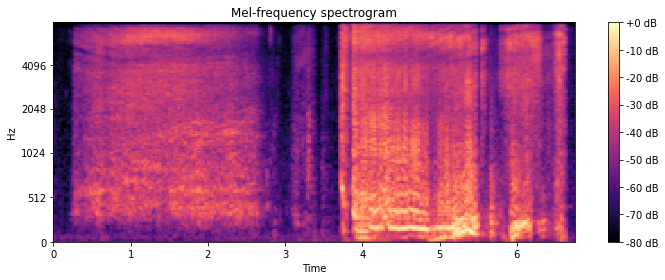

In [8]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [0]:
data_librosa = []
for fname in data_csv['fname']:
    data_mel= librosa.feature.melspectrogram(y=y, sr=sr)
    data_librosa.append(data_mel)

In [0]:
label=[]
for l in data_csv['label']:
    label = list(data_csv['label'])

In [0]:
with open('/content/gdrive/My Drive/data_mel.pickle', 'wb') as f_d:
    pickle.dump(data_mel, f_d)

In [0]:
with open('/content/gdrive/My Drive/data_mel.pickle', 'rb') as f:
  data_pickle = pickle.load(f)

In [0]:
max_column = 0
for i in data_librosa:
  if max_column <= i.shape[1]:
    max_column = i.shape[1]


In [0]:
norm_data = []
for ss in data_librosa:
  new_matrix = np.zeros((128, max_column)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data.append(new_matrix.ravel())

In [0]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, label, test_size=1/3, random_state=42)

In [29]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

      Acoustic_guitar       0.00      0.00      0.00        59
             Applause       0.00      0.00      0.00        54
                 Bark       0.02      1.00      0.04        37
            Bass_drum       0.00      0.00      0.00        52
Burping_or_eructation       0.00      0.00      0.00        44
                  Bus       0.00      0.00      0.00        20
                Cello       0.00      0.00      0.00        59
                Chime       0.00      0.00      0.00        26
             Clarinet       0.00      0.00      0.00        60
    Computer_keyboard       0.00      0.00      0.00        18
                Cough       0.00      0.00      0.00        55
              Cowbell       0.00      0.00      0.00        32
          Double_bass       0.00      0.00      0.00        67
 Drawer_open_or_close       0.00      0.00      0.00        28
       Electric_piano       0.00      0.00      0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
y_pred_2 = classifier.predict(X_train)

In [28]:
print(classification_report(y_train, y_pred_2))

                       precision    recall  f1-score   support

      Acoustic_guitar       0.00      0.00      0.00       128
             Applause       0.00      0.00      0.00       129
                 Bark       0.03      1.00      0.06       110
            Bass_drum       0.00      0.00      0.00       129
Burping_or_eructation       0.00      0.00      0.00        69
                  Bus       0.00      0.00      0.00        44
                Cello       0.00      0.00      0.00       127
                Chime       0.00      0.00      0.00        52
             Clarinet       0.00      0.00      0.00       116
    Computer_keyboard       0.00      0.00      0.00        48
                Cough       0.00      0.00      0.00       108
              Cowbell       0.00      0.00      0.00        85
          Double_bass       0.00      0.00      0.00       124
 Drawer_open_or_close       0.00      0.00      0.00        66
       Electric_piano       0.00      0.00      0.00  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
